# Titanic Disaster Survival Prediction

Predicting who might have survived from the titanic disaster.
Dataset gotten from kaggle - https://www.kaggle.com/c/titanic

# Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Data Import and Inspection

In [2]:
!ls


Submission.csv                    test.csv
Titanic Survival Prediction.ipynb train.csv
gender_submission.csv


In [3]:
titanic_data = pd.read_csv("train.csv")

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
titanic_data["Age"].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
66.00     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

# Data Analysis

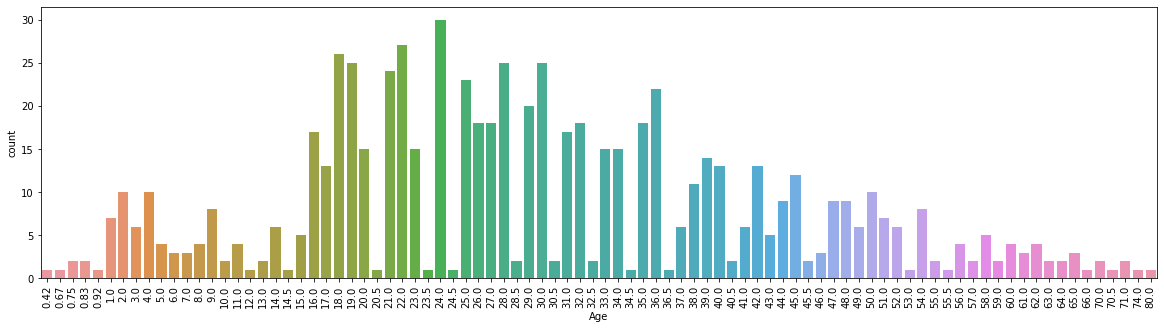

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(x = titanic_data["Age"], data = titanic_data)
plt.xticks(rotation=90)
plt.show()


In [10]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
selected_colums = ['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Embarked']


In [12]:
enu_features = enumerate(selected_colums)
enu_features

In [13]:
enu_features_list = list(enu_features )
enu_features_list

[(0, 'Pclass'),
 (1, 'Sex'),
 (2, 'Age'),
 (3, 'SibSp'),
 (4, 'Parch'),
 (5, 'Embarked')]

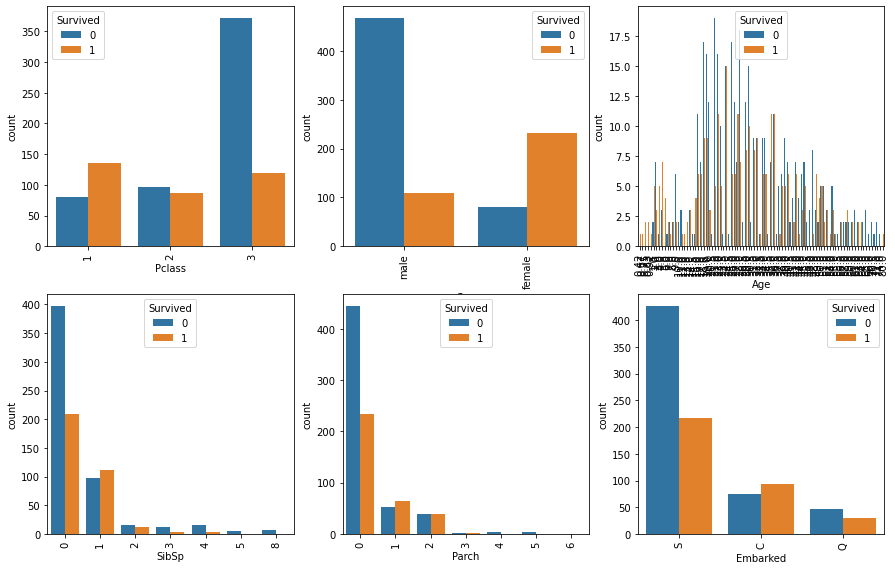

In [14]:
#using for loop for subplots
plt.figure(figsize=(15,15))
for feature in enu_features_list:
    plt.subplot(3,3,feature[0] + 1)
    plt.xticks(rotation=90)
    sns.countplot(x = feature[1], hue="Survived", data=titanic_data)
    


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

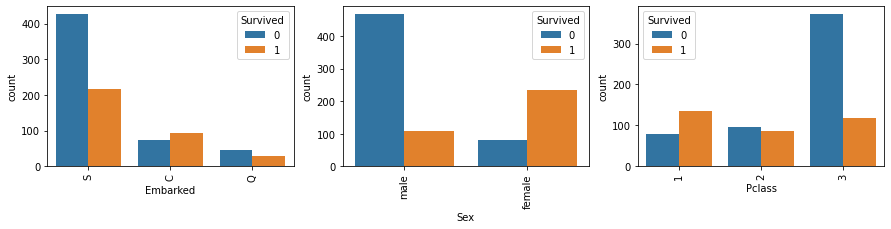

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(x = "Embarked", hue="Survived", data=titanic_data)
plt.xticks(rotation=90)


plt.subplot(3,3,2)
sns.countplot(x = "Sex", hue="Survived", data=titanic_data)
plt.xticks(rotation=90)


plt.subplot(3,3,3)
sns.countplot(x = "Pclass", hue="Survived", data=titanic_data)
plt.xticks(rotation=90)



In [16]:
#how many females survived?
titanic_data.groupby(["Sex"])["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

# Data Preprocessing

In [17]:
titanic_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
titanic_data = titanic_data.drop(columns=["Cabin"])
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace=True)
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)


titanic_data.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
encoder = LabelEncoder()

In [21]:
#Embarked = C-0, S-1, Q-2
#Sex = F-0, M-1
titanic_data["Embarked"] = encoder.fit_transform(titanic_data["Embarked"])
titanic_data["Sex"] = encoder.fit_transform(titanic_data["Sex"])

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


# Train Test Split

In [23]:
X = titanic_data.drop(columns=["PassengerId","Name", "Ticket", "Survived"])
Y = titanic_data["Survived"]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Model Selection and Evaluation on Training Data

In [25]:
logistic_reg = LogisticRegression()

In [26]:
logistic_reg.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_train_predict = logistic_reg.predict(X_train)
train_accuracy_score = accuracy_score(Y_train, y_train_predict)
train_accuracy_score

0.8033707865168539

# Model Evaluation on Test Data

In [28]:
y_test_predict = logistic_reg.predict(X_test)
test_accuracy_score = accuracy_score(Y_test, y_test_predict)
test_accuracy_score

0.7988826815642458

# Let's Take it a step further - Kaggle Submission

In [29]:
#train on all data


In [30]:
model = LogisticRegression()

In [31]:
model.fit(X,Y)

LogisticRegression()

In [32]:
test_titanic = pd.read_csv("test.csv")

In [33]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test_titanic = test_titanic.drop(columns=["Cabin"])
test_titanic["Age"].fillna(test_titanic["Age"].mean(), inplace=True)
test_titanic["Embarked"].fillna(test_titanic["Embarked"].mode()[0], inplace=True)
test_titanic["Fare"].fillna(test_titanic["Fare"].mean(),inplace=True)

test_titanic.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
#Embarked = C-0, S-1, Q-2
#Sex = F-0, M-1
test_titanic["Embarked"] = encoder.fit_transform(test_titanic["Embarked"])
test_titanic["Sex"] = encoder.fit_transform(test_titanic["Sex"])


In [36]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [37]:
X = test_titanic.drop(columns=["PassengerId","Name", "Ticket"])


In [38]:
Y = model.predict(X)
Y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
sub = pd.DataFrame({"PassengerId" : test_titanic.PassengerId,
                   "Survived" : Y})

In [40]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [41]:
sub_output = sub.to_csv("Submission.csv", index=False)